<a href="https://colab.research.google.com/github/LudovicSaintBauzel/AI4Health/blob/main/SummerSchool2023_IA_Sante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initialisation des librairies pour le travail.

In [1]:
import pandas as pd
import os
import glob
import math
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Chargement des données

In [2]:
!curl -O https://nuage.isir.upmc.fr/index.php/s/ZiPJ3RFGFaF3HBs/download/records.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.9M  100 18.9M    0     0  3363k      0  0:00:05  0:00:05 --:--:-- 3847k


# Analyse et travail sur les données

In [3]:
!unzip -o records.zip
!ls 

Archive:  records.zip
   creating: records/
   creating: records/move/
  inflating: records/.DS_Store       
  inflating: __MACOSX/records/._.DS_Store  
   creating: records/MA/
   creating: records/test/
   creating: records/OL/
   creating: records/fx/
   creating: records/BO2504/
   creating: records/fuzzy/
   creating: records/test1/
   creating: records/traj/
   creating: records/MMESA/
   creating: records/MMECA/
   creating: records/test2/
  inflating: records/DESCRIPTIONS_DONNEES.txt  
  inflating: __MACOSX/records/._DESCRIPTIONS_DONNEES.txt  
   creating: records/LE1804/
   creating: records/move/do1/
   creating: records/move/test/
   creating: records/move/do/
   creating: records/move/test_ludo4/
   creating: records/move/test_ludo3/
   creating: records/move/test_ludo2/
 extracting: records/move/testen.txt  
   creating: records/move/test_ludo5/
   creating: records/move/test1/
   creating: records/move/marc/
  inflating: records/move/follow_traj.txt  
  inflating: records

## Observons l'organisation des données

Maintenant que les données sont téléchargées, il est possible de connaître l'organisation des données en ouvrant le fichier (/content/records/DESCRIPTIONS_DONNEES.txt). On note que le fichier follow_traj.txt contient toutes les informations utiles pour la classification que nous souhaitons effectuer. 


In [4]:
s = [[file for file in glob.glob("*/*/*/follow_traj.txt")]]

flats = []
for sub_s in s:
    for item in sub_s:
        flats.append(item)
print(flats)


['records/move/test_ludo4/follow_traj.txt', 'records/move/test_ludo8/follow_traj.txt', 'records/MA/move6/follow_traj.txt', 'records/MA/fx9/follow_traj.txt', 'records/MA/fx7/follow_traj.txt', 'records/MA/move7/follow_traj.txt', 'records/MA/fx6/follow_traj.txt', 'records/MA/fx1/follow_traj.txt', 'records/MA/fx8/follow_traj.txt', 'records/MA/traj3/follow_traj.txt', 'records/MA/traj4/follow_traj.txt', 'records/MA/traj5/follow_traj.txt', 'records/MA/traj2/follow_traj.txt', 'records/MA/fuz2/follow_traj.txt', 'records/MA/fuz4/follow_traj.txt', 'records/MA/fuz3/follow_traj.txt', 'records/MA/fx10/follow_traj.txt', 'records/MA/fx4/follow_traj.txt', 'records/MA/fx3/follow_traj.txt', 'records/MA/move2/follow_traj.txt', 'records/MA/move5/follow_traj.txt', 'records/MA/fx2/follow_traj.txt', 'records/MA/fx5/follow_traj.txt', 'records/MA/move4/follow_traj.txt', 'records/MA/move3/follow_traj.txt', 'records/MA/traj9/follow_traj.txt', 'records/MA/traj7/follow_traj.txt', 'records/MA/traj1/follow_traj.txt',

In [5]:
df = pd.read_csv(flats[0], sep='\s+', header=None)
df['file'] = pd.Series([flats[1] for i in df[0]])
print(df)

          0            1           2    3          4         5         6  \
0       602  1088.390429  717.816146  0.0 -10.968690 -4.711714  5.924883   
1       628  1089.786735  714.200279  0.0 -12.049807 -5.019252  6.751390   
2       641  1089.786735  714.200279  0.0 -13.483279 -5.255205  7.506610   
3       654  1088.494830  716.777125  0.0 -15.214176 -5.379855  8.139253   
4       667  1088.494830  716.777125  0.0 -17.155514 -5.374000  8.654951   
...     ...          ...         ...  ...        ...       ...       ...   
5731  72586   836.744121  986.451059  0.0  -0.389116 -0.016835  0.334910   
5732  72599   836.744121  986.451059  0.0  -0.391051 -0.018789  0.325168   
5733  72605   838.417968  984.463406  0.0  -0.396874 -0.029755  0.314681   
5734  72618   836.744121  986.451059  0.0  -0.399046 -0.038463  0.304923   
5735  72631   836.744121  986.451059  0.0  -0.400732 -0.038151  0.297587   

              7         8         9  ...          12         13         14  \
0    -12.

In [6]:
for f in flats:
  fd_stat = os.stat(f)
  if fd_stat.st_size==0:
    print('Fichier à retirer : ' + f + " car fichier vide")

Fichier à retirer : records/BO2504/test/follow_traj.txt car fichier vide
Fichier à retirer : records/fuzzy/tt/follow_traj.txt car fichier vide
Fichier à retirer : records/test1/traj/follow_traj.txt car fichier vide


In [7]:
df = pd.read_csv(flats[1], sep='\s+', header=None)
df['file'] = pd.Series([flats[1] for i in df[0]])
print(df)

          0           1           2    3         4         5         6  \
0     -1563  968.291763  861.182553  0.0  0.052732 -0.038678 -0.041029   
1     -1524  965.093953  863.441464  0.0  0.058819 -0.041941 -0.038845   
2     -1511  965.093953  863.441464  0.0  0.065318 -0.045420 -0.038580   
3     -1498  961.883005  865.659181  0.0  0.069327 -0.051385 -0.041035   
4     -1485  961.883005  865.659181  0.0  0.067531 -0.058732 -0.040105   
...     ...         ...         ...  ...       ...       ...       ...   
3346  39798  838.417968  984.463406  0.0  0.043812  0.100370  0.122815   
3347  39811  838.417968  984.463406  0.0  0.027179  0.092638  0.125387   
3348  39824  838.417968  984.463406  0.0  0.006292  0.088870  0.123469   
3349  39837  838.417968  984.463406  0.0 -0.011166  0.083485  0.120565   
3350  39850  838.417968  984.463406  0.0 -0.018451  0.071197  0.117916   

             7         8         9  ...   12   13   14   15   16   17  18  \
0     0.476282 -0.359697  0.280075

In [8]:
df[19]

0      -0.0
1      -0.0
2      -0.0
3      -0.0
4      -0.0
       ... 
3346   -0.0
3347   -0.0
3348   -0.0
3349   -0.0
3350   -0.0
Name: 19, Length: 3351, dtype: float64

In [9]:
filtering_data = ['records/test1/traj/follow_traj.txt',
                  'records/BO2504/test/follow_traj.txt',
                  'records/fuzzy/tt/follow_traj.txt',
                  'records/test1/fx/follow_traj.txt',
                  # Above Problematic data : Below test data not relevant
                  'records/test1/av/follow_traj.txt',
                  'records/test2/traj/follow_traj.txt',
                  'records/test2/av/follow_traj.txt',
                  'records/traj/test/follow_traj.txt',
                  'records/move/follow_traj.txt',
                  'NO_march1-3/follow_traj.txt',
                  'NO_march6-10/follow_traj.txt',
                  'GU_marche1/follow_traj.txt',
                  'GU_marche2/follow_traj.txt'
                  ]

for ff in flats[1:]:
    dftmp = []
    if ff in filtering_data:
        print("File filtered not loaded : "+str(ff)+"\n")
        continue
    print("File opened and loaded : " + str(ff) + "\n")
    dftmp = pd.read_csv(ff, sep='\s+', header=None)
    if len(dftmp) > 0:
        print("Appending len(dftmp):" + str(len(dftmp))+"\n")
        dftmp['file'] = pd.Series([ff for i in dftmp[0]])
        df = df.append(dftmp)

print('len(df)=' + str(len(df)))

File opened and loaded : records/move/test_ludo8/follow_traj.txt

Appending len(dftmp):3351

File opened and loaded : records/MA/move6/follow_traj.txt

Appending len(dftmp):1113

File opened and loaded : records/MA/fx9/follow_traj.txt

Appending len(dftmp):1182

File opened and loaded : records/MA/fx7/follow_traj.txt

Appending len(dftmp):1190

File opened and loaded : records/MA/move7/follow_traj.txt

Appending len(dftmp):1118

File opened and loaded : records/MA/fx6/follow_traj.txt

Appending len(dftmp):1463

File opened and loaded : records/MA/fx1/follow_traj.txt

Appending len(dftmp):2517

File opened and loaded : records/MA/fx8/follow_traj.txt

Appending len(dftmp):951

File opened and loaded : records/MA/traj3/follow_traj.txt

Appending len(dftmp):400

File opened and loaded : records/MA/traj4/follow_traj.txt

Appending len(dftmp):494

File opened and loaded : records/MA/traj5/follow_traj.txt

Appending len(dftmp):354

File opened and loaded : records/MA/traj2/follow_traj.txt

Ap

/var/folders/0d/lbvjsrb52qs75rv0l_prcrpm0000gn/T/ipykernel_95520/1794434035.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dftmp)
/var/folders/0d/lbvjsrb52qs75rv0l_prcrpm0000gn/T/ipykernel_95520/1794434035.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dftmp)
/var/folders/0d/lbvjsrb52qs75rv0l_prcrpm0000gn/T/ipykernel_95520/1794434035.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dftmp)
/var/folders/0d/lbvjsrb52qs75rv0l_prcrpm0000gn/T/ipykernel_95520/1794434035.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dftmp)
/var/folders/0d/lbvjsrb52qs75rv0l_prcrpm

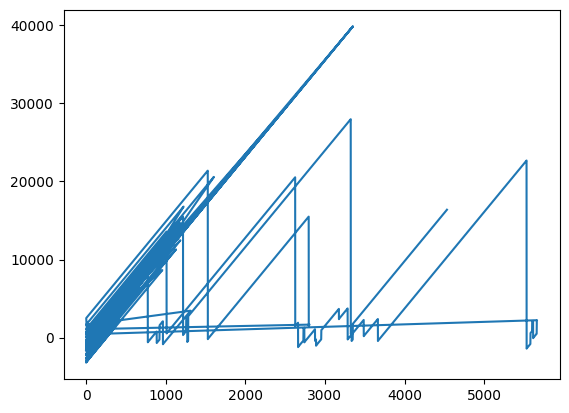

In [12]:
import matplotlib.pyplot as mpl
#mydf= [val for val in df if (df['file']=='records/MA/traj1/follow_traj.txt')]
mpl.plot(df[0])

In [ ]:
[df[0] if (df['file']=='records/MA/traj1/follow_traj.txt')]



SyntaxError: ignored

# Apprentissage des données

## Construction des données de validation et de test

In [13]:
lDatas = len(df)
lowLDatas = math.floor(lDatas/10)
df_d = df.drop('file', axis=1)

dfTrainIN = df_d.drop([0, 18, 19, 20], axis=1)[1:10000]
dfTrainOUT = df_d[19][1:10000]
dfTestIN = df_d.drop([0, 18, 19, 20], axis=1)[10000:20000]
dfTestOUT = df_d[19][10000:20000]

/var/folders/0d/lbvjsrb52qs75rv0l_prcrpm0000gn/T/ipykernel_95520/2575412409.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  dfTrainOUT = df_d[19][1:10000]
/var/folders/0d/lbvjsrb52qs75rv0l_prcrpm0000gn/T/ipykernel_95520/2575412409.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  dfTestOUT = df_d[19][10000:20000]


In [14]:
scaler = StandardScaler()
scaler.fit(dfTrainIN)
dfTrainIN = scaler.transform(dfTrainIN)
dfTestIN = scaler.transform(dfTestIN)


ValueError: could not convert string to float: '-'

## Apprentissage (scikit)

# Apprentissage (keras)